In [16]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

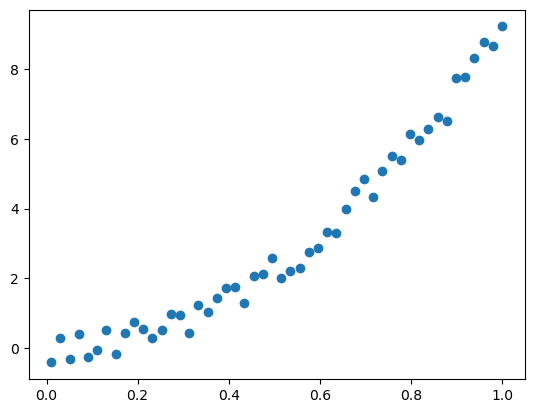

In [17]:
n = 50
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 3, n) * np.linspace(0.01, 3, n) + np.random.rand(n) - .5


plt.scatter(x,y)

## Linear Regression - no regularization

In [18]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([9.26020064]), -1.5871956064524473)

## Linear "Ridge" Regression - L2 regularization

In [19]:
ridge = linear_model.Ridge(alpha=.75)

ridge.fit(x, y)

ridge.coef_, ridge.intercept_

(array([7.87129101]), -0.8857962438156313)

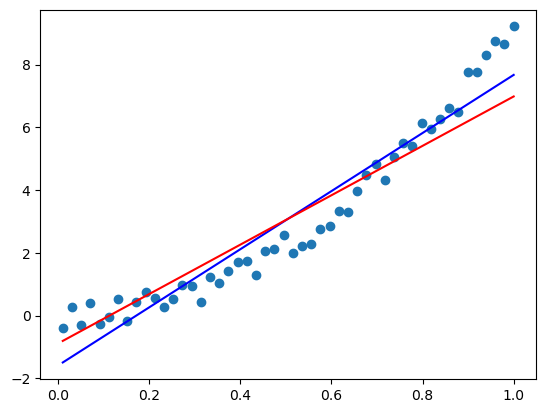

In [20]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')
plt.plot(x, x*ridge.coef_ + ridge.intercept_, c='r')

Clearly Linear 1 degree (y = m x) don't fix very well

## Let's try $x^{15}$ polynomial!

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)

x_15 = poly.fit_transform(x.reshape(-1, 1))

In [22]:
linear = linear_model.LinearRegression()

linear.fit(x_15, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00,  1.92794603e+02, -7.59722953e+03,  1.52423634e+05,
        -1.83805230e+06,  1.45632186e+07, -7.96365907e+07,  3.09444523e+08,
        -8.69033347e+08,  1.77749945e+09, -2.64450252e+09,  2.82790351e+09,
        -2.11563148e+09,  1.05044554e+09, -3.10834756e+08,  4.14754967e+07]),
 -1.698911812442034)

In [23]:
ridge = linear_model.Ridge()

ridge.fit(x_15, y)

(ridge.coef_, ridge.intercept_)

(array([ 0.        ,  2.46401654,  2.2076891 ,  1.71143901,  1.27085749,
         0.91960723,  0.64683952,  0.43604997,  0.27274519,  0.14552151,
         0.04570903, -0.03320895, -0.09611732, -0.14668184, -0.18766191,
        -0.22114355]),
 0.07168812564408711)

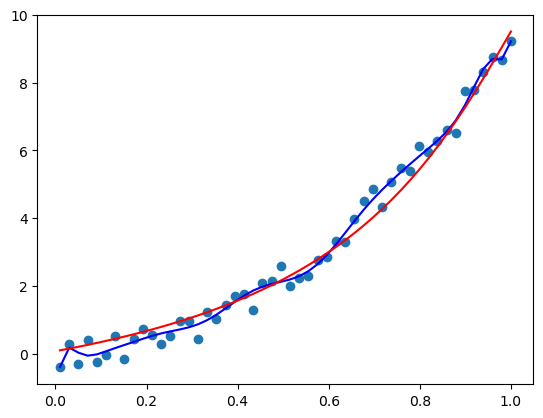

In [24]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

We can see that the non-ridge model fits points very well. But how does it fare for new points?

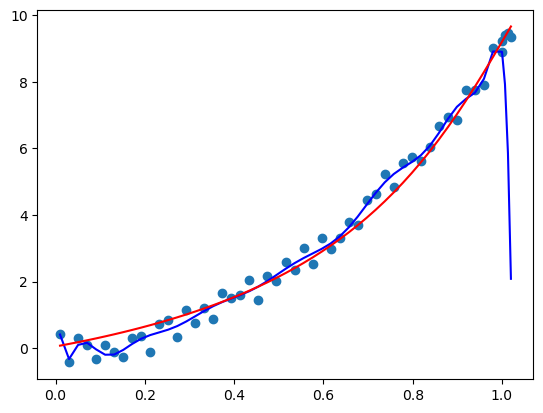

In [13]:
m = 4
x_final = 1.02
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

Clearly, the new predictions are not so great.

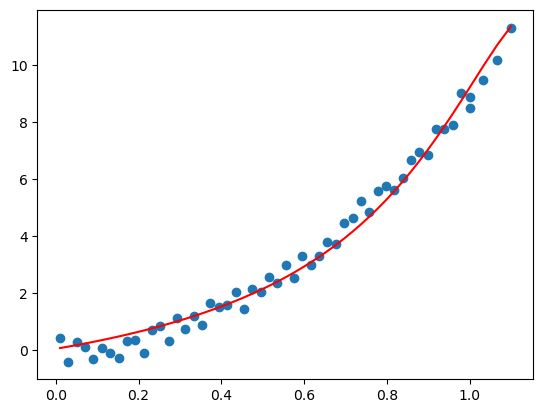

In [14]:
m = 4
x_final = 1.1
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

The Ridge model fares better for new values. 

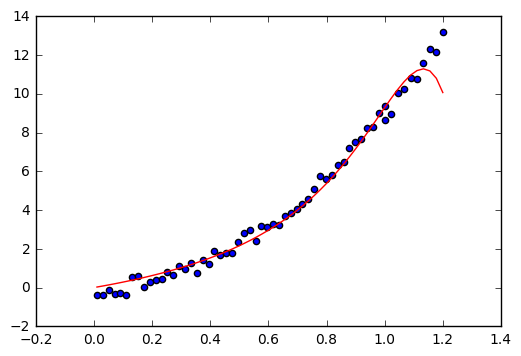

In [174]:
m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

But not all new values

## Back to $x^2$ degree model 

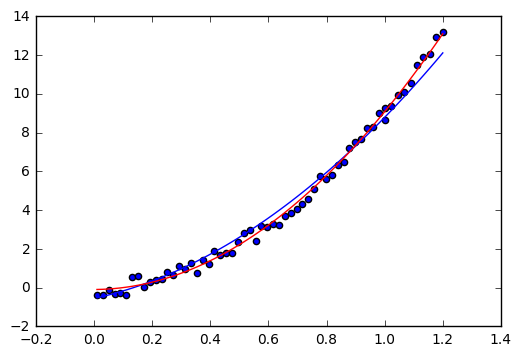

In [178]:
poly2 = PolynomialFeatures(degree=2)

m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_poly = poly2.fit_transform(x2)

y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


ridge = linear_model.Ridge()
ridge.fit(x_poly, y2)

model = linear_model.LinearRegression()
model.fit(x_poly, y2)

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_poly, ridge.coef_) + ridge.intercept_, c='b')
plt.plot(x2, np.dot(x_poly, model.coef_) + model.intercept_, c='r')